In [2]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np 
torch.manual_seed(446)
np.random.seed(446)

In [6]:
x = torch.ones(5,3)
print(x)
if torch.cuda.is_available():
    device = torch.device("cuda")
y = torch.ones_like(x,device=device)
x = x.to(device)
z = x+y
print(z)
print(z.to("cpu"),torch.double)





tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])torch.float64


In [22]:
# 创建tensor和array
x_numpy = np.array([0.1,0.2,0.3])
x_torch = torch.tensor([0.1,0.2,0.3])
print('x_numpy, x_torch')
print(x_numpy,x_torch)
print("--------------")

# numpy和Tensor相互转化
# numpy -> pytorch
print(torch.from_numpy(x_numpy))
# pytorch -> numpy
print(x_torch.numpy())
print("--------------")

# 运算
y_numpy = np.array([3,1,5.])
y_torch = torch.tensor([3,4,5.])
print(x_numpy+y_numpy)
print(x_torch+y_torch)

# many functions that are in numpy are also in pytorch
print("norm")
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print()

x_numpy, x_torch
[0.1 0.2 0.3]tensor([0.1000, 0.2000, 0.3000])
--------------
tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)
[0.1 0.2 0.3]
--------------
[3.1 1.2 5.3]
tensor([3.1000, 4.2000, 5.3000])
norm
0.37416573867739417tensor(0.3742)



In [24]:
# to apply an operation along a dimension,
# we use the dim keyword argument instead of axis
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_torch = torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0))
print(torch.mean(x_torch, dim=0))

mean along the 0th dimension
[2. 3.]
tensor([2., 3.])


In [27]:
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H)) # torch.randn生成标准正态分布
print(X.shape)
print(X.view(-1,3,784).shape) # -1可以自动计算出

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])


In [32]:
# BROADCASTING
# PyTorch operations support NumPy Broadcasting Semantics.
x=torch.empty(5,1,1,1) # empty表示不进行初始化，所以运行快一些
y=torch.empty(  3,2,1)
print((x+y).size())
# broadcast是一种机制，自动扩展，对于不同维度之间矩阵运算时，把其中维度是1的自动扩展成较大的矩阵的。


torch.Size([5, 3, 2, 1])


In [33]:
a = torch.tensor(2.0, requires_grad=True) # we set requires_grad=True to let PyTorch know to keep the graph
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

ctensor(3., grad_fn=<AddBackward0>)
dtensor(2., grad_fn=<AddBackward0>)
etensor(6., grad_fn=<MulBackward0>)


In [40]:
cpu = torch.device("cpu")
gpu = torch.device("cuda")
x = torch.randn(10)
x = x.to(gpu)
y = torch.randn(10).to(gpu)
print(x+y)



tensor([-0.8369, -2.0791,  0.1583, -1.4140,  0.5580,  0.6051,  0.5864,  0.3045,
        -0.0098, -0.2942], device='cuda:0')


In [43]:
# 自动求导
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)

y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad)

Analytical f'(x):tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x):tensor([-2.])


In [44]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('PyTorch\'s grad g(w)', w.grad)


Analytical grad g(w)tensor([2.0000, 5.2832])
PyTorch's grad g(w)tensor([2.0000, 5.2832])


In [50]:
def f(x):
    return (x-2)**2

x = torch.tensor([5.0],requires_grad=True)
step_size = 0.25

for i in range(15):
    y = f(x)
    y.backward()
    x.data = x.data - step_size*x.grad
    x.grad.detach_()
    x.grad.zero_()
    print(i,x)


0tensor([3.5000], requires_grad=True)
1tensor([2.7500], requires_grad=True)
2tensor([2.3750], requires_grad=True)
3tensor([2.1875], requires_grad=True)
4tensor([2.0938], requires_grad=True)
5tensor([2.0469], requires_grad=True)
6tensor([2.0234], requires_grad=True)
7tensor([2.0117], requires_grad=True)
8tensor([2.0059], requires_grad=True)
9tensor([2.0029], requires_grad=True)
10tensor([2.0015], requires_grad=True)
11tensor([2.0007], requires_grad=True)
12tensor([2.0004], requires_grad=True)
13tensor([2.0002], requires_grad=True)
14tensor([2.0001], requires_grad=True)


In [54]:
d = 2
n = 50
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n,1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)


X shapetorch.Size([50, 2])
y shapetorch.Size([50, 1])
w shapetorch.Size([2, 1])


In [62]:
def model(X, w):
    return X @ w
def rss(y,y_hat):
    return torch.norm(y-y_hat)**2/n
w = torch.tensor([[1.],[0]],requires_grad=True)
y_hat = model(X, w)
loss = rss(y,y_hat)
loss.backward()
print(w.grad.view(2).numpy())

[ 3.3530583 -2.4397953]


In [64]:
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward() # compute the gradient of the loss
    
    w.data = w.data - step_size * w.grad # do a gradient descent step
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    w.grad.detach()
    w.grad.zero_()

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	0.02,	[-0.9562099  1.8941673]
1,	0.02,	[-0.9629652  1.9063116]
2,	0.01,	[-0.9687125  1.9168389]
3,	0.01,	[-0.97360665  1.9259619 ]
4,	0.01,	[-0.9777779  1.9338659]
5,	0.01,	[-0.9813359  1.9407123]
6,	0.01,	[-0.98437315  1.9466414 ]
7,	0.01,	[-0.9869678  1.9517752]
8,	0.01,	[-0.98918587  1.9562194 ]
9,	0.01,	[-0.9910833  1.9600661]
10,	0.01,	[-0.9927075  1.963395 ]
11,	0.01,	[-0.99409854  1.9662756 ]
12,	0.01,	[-0.99529064  1.9687678 ]
13,	0.01,	[-0.99631274  1.9709237 ]
14,	0.01,	[-0.9971895  1.9727886]
15,	0.01,	[-0.99794203  1.9744015 ]
16,	0.01,	[-0.9985881  1.9757963]
17,	0.01,	[-0.999143   1.9770025]
18,	0.01,	[-0.99961984  1.9780455 ]
19,	0.01,	[-1.0000298  1.9789472]

true w[-1.  2.]
estimated w[-1.0000298  1.9789472]


In [77]:
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch.tensor([[1.,2,3], [4,5,6]])
# applys a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensortorch.Size([2, 3])
transormedtorch.Size([2, 4])

We can see that the weights exist in the background

W:Parameter containing:
tensor([[-0.1957,  0.4242, -0.2548],
        [-0.4407, -0.3990, -0.4644],
        [-0.1361,  0.1039, -0.2420],
        [ 0.3804,  0.4228, -0.4247]], requires_grad=True)
b:Parameter containing:
tensor([-0.3251,  0.2807,  0.3762, -0.2688], requires_grad=True)


In [81]:
# 激活函数
activation_fn = nn.ReLU()
example_tensor = torch.tensor([-1.0,1.0,0.0])
activated = activation_fn(example_tensor)
print('原Tensor',example_tensor)
print('激活函数后',activated)

原Tensortensor([-1.,  1.,  0.])
激活函数后tensor([0., 1., 0.])


In [92]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
    nn.Linear(d_in,d_hidden),
    nn.Tanh(),
    nn.Linear(d_hidden,d_out),
    nn.Sigmoid()
)
example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print(transformed.shape)

torch.Size([2, 1])


In [93]:
params = model.parameters()
for param in params:
    print(param)

Parameter containing:
tensor([[ 0.5748,  0.4048, -0.2273],
        [ 0.2648, -0.4029, -0.0013],
        [ 0.0489,  0.3376,  0.3599],
        [-0.1877, -0.0872,  0.2434]], requires_grad=True)
Parameter containing:
tensor([-0.5628, -0.0825,  0.3284, -0.0410], requires_grad=True)
Parameter containing:
tensor([[ 0.4314, -0.0531, -0.2126, -0.1080]], requires_grad=True)
Parameter containing:
tensor([0.4178], requires_grad=True)


In [94]:
# Loss Functions
mse_loss_fn = nn.MSELoss()
input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mse_loss_fn(input,target)
print(loss)

tensor(0.6667)


In [104]:
model = nn.Linear(1,1)

x_simple = torch.tensor([[1.]])
print(x_simple.shape)
y_simple = torch.tensor([[2.]])

optim = torch.optim.SGD(model.parameters(),lr = 0.01)
mse_loss_fn = nn.MSELoss()
y_hat = model(x_simple)
print(model.weight)
loss = mse_loss_fn(y_simple,y_hat)
optim.zero_grad()
loss.backward()
optim.step()
print(model.weight)
# 可以看到向正确方向更新了

torch.Size([1, 1])
Parameter containing:
tensor([[0.1882]], requires_grad=True)
Parameter containing:
tensor([[0.2382]], requires_grad=True)


In [109]:
step_size = 0.1
linear_module = nn.Linear(d,1,bias=False)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(),lr = step_size)

print("iter,\tloss,\tw")
for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print()
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))     
print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w

0,	4.61,	[-0.5192869  -0.18363538]

1,	3.42,	[-0.5620383  0.1214309]

2,	2.54,	[-0.60356677  0.38300654]

3,	1.88,	[-0.6431218  0.6074016]

4,	1.40,	[-0.68023795  0.7999897 ]

5,	1.04,	[-0.71465963  0.965351  ]

6,	0.78,	[-0.7462831  1.1073923]

7,	0.58,	[-0.77511275  1.2294487 ]

8,	0.43,	[-0.80122733  1.3343694 ]

9,	0.33,	[-0.82475513  1.4245902 ]

10,	0.24,	[-0.84585506  1.502195  ]

11,	0.18,	[-0.86470294  1.5689673 ]

12,	0.14,	[-0.8814816  1.6264349]

13,	0.11,	[-0.8963735  1.6759069]

14,	0.08,	[-0.90955627  1.7185059 ]

15,	0.06,	[-0.921199   1.7551949]

16,	0.05,	[-0.93146056  1.7868004 ]

17,	0.04,	[-0.9404882  1.8140318]

18,	0.03,	[-0.9484174  1.8374989]

19,	0.03,	[-0.9553716  1.8577254]

true w[-1.  2.]
estimated w[-0.9553716  1.8577254]


In [108]:
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)
print('iter,\tloss,\tw')
for i in range(200):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx] 
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx]) # only compute the loss on the single point
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	4.18,	[-0.45587733  0.6911105 ]
20,	0.02,	[-0.5271888  1.0861243]
40,	0.70,	[-0.6328247  1.2643423]
60,	0.09,	[-0.7719242  1.4675599]
80,	0.02,	[-0.8110667  1.6330433]
100,	0.01,	[-0.86233574  1.6920401 ]
120,	0.00,	[-0.8519443  1.7723224]
140,	0.07,	[-0.90176195  1.8281428 ]
160,	0.00,	[-0.9338851  1.8732009]
180,	0.01,	[-0.9430709  1.9004847]

true w[-1.  2.]
estimated w[-0.9490327  1.9111907]


In [110]:
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)
print('iter,\tloss,\tw')
for i in range(200):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx] 
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx]) # only compute the loss on the single point
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	1.03,	[0.5373249 0.6153356]
20,	5.99,	[0.16202323 0.8077964 ]
40,	1.73,	[-0.03474743  0.9645488 ]
60,	0.05,	[-0.40145388  1.3022832 ]
80,	1.07,	[-0.51749796  1.3842022 ]
100,	0.22,	[-0.7024131  1.6244776]
120,	0.00,	[-0.8123988  1.6751256]
140,	0.00,	[-0.8530257  1.772686 ]
160,	0.13,	[-0.8768248  1.8238847]
180,	0.03,	[-0.9152587  1.8847888]

true w[-1.  2.]
estimated w[-0.94394547  1.9188616 ]


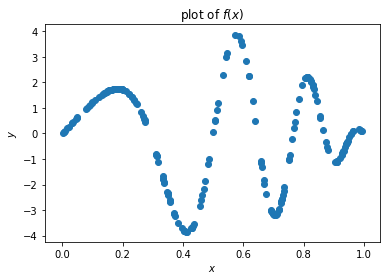

In [111]:
%matplotlib inline

d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

In [112]:
# feel free to play with these parameters

step_size = 0.05
n_epochs = 6000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
                            nn.Linear(d, n_hidden_1), 
                            nn.Tanh(),
                            nn.Linear(n_hidden_1, n_hidden_2),
                            nn.Tanh(),
                            nn.Linear(n_hidden_2, d_out)
                            )

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), lr=step_size)
print('iter,\tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (n_epochs // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss.item()))



iter,	loss
0,	3.75
600,	2.18
1200,	1.89
1800,	1.68
2400,	1.23
3000,	0.80
3600,	0.25
4200,	0.13
4800,	0.09
5400,	0.07


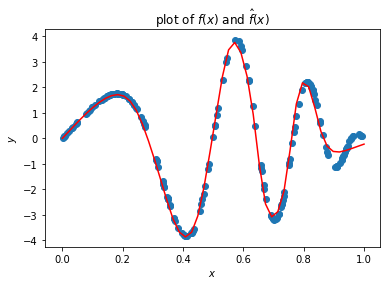

In [113]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [115]:
# an entire mnist digit
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

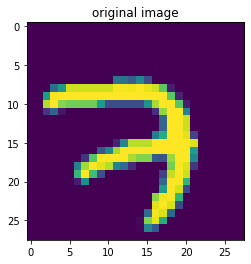

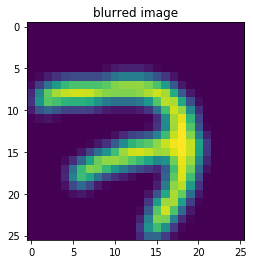

In [116]:
# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0

conv = nn.Conv2d(1, 1, 3)
# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

In [121]:
from torch.utils.data import Dataset, DataLoader


class FakeDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [120]:
x = np.random.rand(100, 10)
y = np.random.rand(100)

dataset = FakeDataset(x, y)
dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=True, num_workers=4)

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched)

RuntimeError: DataLoader worker (pid(s) 19392, 15420, 3060, 19320) exited unexpectedly

In [17]:
import torch
N,D_in,H,D_out = 64,1000,100,10

x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H,D_out)
)

loss_fn = torch.nn.MSELoss()
step_size = 0.1
optim = torch.optim.SGD(model.parameters(),lr = step_size)

for i in range(500):
    y_hat = model(x)
    loss = loss_fn(y_hat,y)
    if i % 10==0:
        print("loss:{:.10f}".format(loss.item()))
    optim.zero_grad()
    loss.backward()
    optim.step()

loss:1.0866472721
loss:0.4219799042
loss:0.1731670648
loss:0.0659792349
loss:0.0255120136
loss:0.0106828203
loss:0.0048213243
loss:0.0022991048
loss:0.0011473395
loss:0.0005938643
loss:0.0003177562
loss:0.0001747054
loss:0.0000985092
loss:0.0000572023
loss:0.0000340862
loss:0.0000207912
loss:0.0000129625
loss:0.0000082503
loss:0.0000053545
loss:0.0000035387
loss:0.0000023782
loss:0.0000016229
loss:0.0000011223
loss:0.0000007861
loss:0.0000005567
loss:0.0000003981
loss:0.0000002870
loss:0.0000002084
loss:0.0000001522
loss:0.0000001118
loss:0.0000000824
loss:0.0000000610
loss:0.0000000453
loss:0.0000000337
loss:0.0000000251
loss:0.0000000188
loss:0.0000000141
loss:0.0000000105
loss:0.0000000079
loss:0.0000000059
loss:0.0000000045
loss:0.0000000034
loss:0.0000000025
loss:0.0000000019
loss:0.0000000014
loss:0.0000000011
loss:0.0000000008
loss:0.0000000006
loss:0.0000000005
loss:0.0000000003
